In [2]:
import tensorflow as tf
model_path = "fine_tuned_model\saved_model"
model = tf.saved_model.load(model_path)

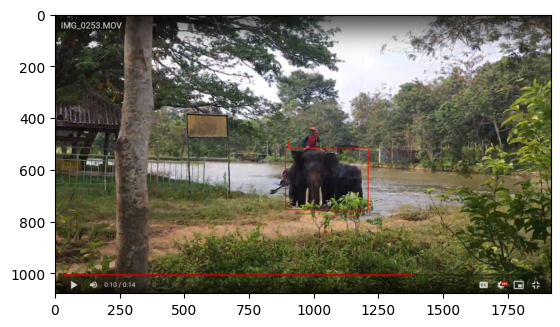

In [5]:
# object detection detect gajah.jpg
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "gajah.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to tensor
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis, ...]

# Run the model
output = model(input_tensor)

# Visualize the result
boxes = output["detection_boxes"].numpy()
classes = output["detection_classes"].numpy().astype(int)

# Draw the bounding boxes
for i in range(boxes.shape[1]):
    if output["detection_scores"].numpy()[0][i] > 0.5:
        ymin, xmin, ymax, xmax = boxes[0][i]
        left, right, top, bottom = xmin * image.shape[1], xmax * image.shape[1], ymin * image.shape[0], ymax * image.shape[0]
        cv2.rectangle(image, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)
        cv2.putText(image, str(classes[0][i]), (int(left), int(top)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show the result
plt.imshow(image)
plt.show()

In [18]:
# predict from video
# Load the video
video_path = "gajah.mp4"
video = cv2.VideoCapture(video_path)

# Get the video properties
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a video writer
video_out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

# Process the video
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Convert the frame to tensor
    input_tensor = tf.convert_to_tensor(frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Run the model
    output = model(input_tensor)

    # Visualize the result
    boxes = output["detection_boxes"].numpy()
    classes = output["detection_classes"].numpy().astype(int)

    # Draw the bounding boxes
    for i in range(boxes.shape[1]):
        if output["detection_scores"].numpy()[0][i] > 0.5:
            ymin, xmin, ymax, xmax = boxes[0][i]
            left, right, top, bottom = xmin * frame.shape[1], xmax * frame.shape[1], ymin * frame.shape[0], ymax * frame.shape[0]
            cv2.rectangle(frame, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)
            cv2.putText(frame, str(classes[0][i]), (int(left), int(top)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Write the frame to the output video
    video_out.write(frame)

# Release the video
video.release()
video_out.release()
cv2.destroyAllWindows()

In [17]:
# real time object detection
# Create a video capture object
video = cv2.VideoCapture(0)

# Process the video
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Convert the frame to tensor
    input_tensor = tf.convert_to_tensor(frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Run the model
    output = model(input_tensor)

    # Visualize the result
    boxes = output["detection_boxes"].numpy()
    classes = output["detection_classes"].numpy().astype(int)

    detect = False

    # Draw the bounding boxes
    for i in range(boxes.shape[1]):
        if output["detection_scores"].numpy()[0][i] > 0.5:
            ymin, xmin, ymax, xmax = boxes[0][i]
            left, right, top, bottom = xmin * frame.shape[1], xmax * frame.shape[1], ymin * frame.shape[0], ymax * frame.shape[0]
            cv2.rectangle(frame, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)
            cv2.putText(frame, str(classes[0][i]), (int(left), int(top)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            detect = True

    # Show the frame
    cv2.imshow("Frame", frame)

    # if detect True, print 1
    if detect:
        print(1)
    detect = False

    # Break the loop
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the video
video.release()
cv2.destroyAllWindows()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
